## In this notebook, we will build a movie recommender system using Cosine Similarity algorithm.

## Get the Dataset

Mount the google drive to access dataset stored in it.

The movie_dataset.csv file (22 MB) is available in the directory.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import required libraries
1. Pandas - open source data analysis and manipulation tool
2. Numpy - allows working with array, comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms
3. Matplotlib - creating static, animated, and interactive visualizations.
4. Sklearn - Simple and efficient tools for predictive data analysis. Built on NumPy, SciPy, and matplotlib. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python
5. sklearn.feature_extraction.text.**CountVectorizer** - Convert a collection of text documents to a vector or matrix of term or token counts.
6. sklearn.metrics.pairwise.**Cosine_Similarity** - Compute cosine similarity between samples in X and Y.

Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:
Cos(X, Y) = <X, Y> / (||X||*||Y||)

On L2-normalized data, this function is equivalent to linear_kernel.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Read the contents of the csv file into a dataframe

In [38]:
movies = pd.read_csv('/content/gdrive/MyDrive/movie_dataset.csv')
movies

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honey

In [39]:
# The dataframe has 4803 rows and 24 columns
movies.shape

(4803, 24)

## Features List

Let's make a list of the features that we will be using and use only those most relevant to us, considering our problem at hand.
Let's choose features - keywords, cast, genres & director.

Perform data preprocessing
Replace any rows having NaN values with a space/empty string, so it does not throw an error while running the code. This pre-processing has been done in the for loop.

In [42]:
features = ['keywords', 'cast', 'genres', 'director']

for feat in features:
    movies[feat] = movies[feat].fillna('')

### Combining Relevant Features into a Single Feature

we will define a function called **combined_features**. The function will combine all our useful features (keywords, cast, genres & director) from their respective rows, and return a row with all the combined features in a single string.

In [43]:
def combined_features(row):
    return row['keywords'] + " " + row['cast'] + " " + row['genres'] + " " + row['director']
    
movies["combined_features"] = movies.apply(combined_features, axis = 1)

We will add a new column, **combined_features** to our existing dataframe (movies) and apply the above function to each row (axis = 1). The dataframe will now have an extra column at the end, which will comprise of rows of the combined features.

In [44]:
movies

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dc comics crime fighter terrorist secret ident...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,based on novel mars medallion space travel pri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"

## Extracting Features

Let's extract features from our data.

The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

We will use CountVectorizer’s fit.transform to count the number of terms and we will print the transformed matrix count_matrix into an array for better understanding.

In [47]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(movies["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Cosine Similarity

We will use the Cosine Similarity from Sklearn, as the metric to compute the similarity between two movies.

Cosine similarity is a metric used to measure how similar two items are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The output value ranges from 0–1.

0 means no similarity, where as 1 means that both the items are 100% similar.

The python Cosine Similarity or cosine kernel, computes similarity as the normalized dot product of input samples X and Y. We will use the sklearn cosine_similarity to find the cos θ for the two vectors in the count matrix.

In [10]:
cosine_sim = cosine_similarity(count_matrix)

In [11]:
cosine_sim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

The cosine_sim matrix is a numpy array with calculated cosine similarity between each movies. The above matrix shows the cosine similarity of movie 0 with movie 0 is 1; they are 100% similar.

Similarly the cosine similarity between movie 0 and movie 1 is 0.105409 (the same score between movie 1 and movie 0 — order does not matter).

Movies 0 and 4 are more similar to each other (with a similarity score of 0.23094) than movies 0 and 3 (score = 0.0377426).

The diagonal with 1s suggests what the case is, each movie ‘x’ is 100% similar to itself!

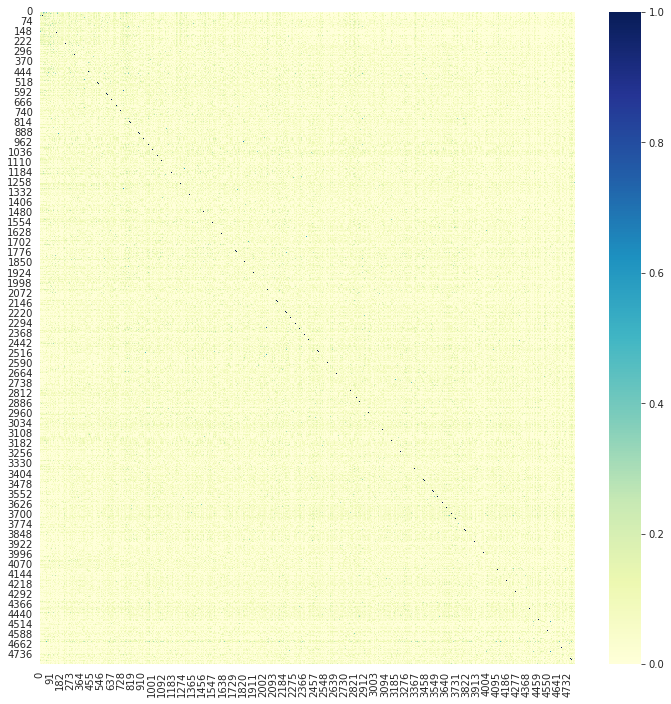

<Figure size 720x720 with 0 Axes>

In [55]:
import seaborn as sns
ax = sns.heatmap(cosine_sim, cmap="YlGnBu")
plt.figure(figsize=(10,10))
plt.show()

## Content User likes

The next step is to take as input a movie that the user likes in the movie_user_likes variable.

Since we are building a content based filtering system, we need to know the users’ likes in order to predict a similar item.

In [57]:
movie_user_likes = "Dead Poets Society"

def get_index_from_title(title):
    return movies[movies.title == title]["index"].values[0]

movie_index = get_index_from_title(movie_user_likes)
print(movie_index)

2453


Suppose I like the movie “Dead Poets Society”. Next, I will build a function to get the index from the name of this movie. The index will be saved in the movie_index variable.

## Generating the Similar Movies Matrix
Next we will generate a list of similar movies.

We will use the movie_index of the movie we have given as input movie_user_likes. 

The enumerate() method will add a counter to the iterable list cosine_sim and return it in a form of a list similar_movies with the similarity score of each index.

In [59]:
similar_movies = list(enumerate(cosine_sim[movie_index]))
similar_movies

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.04499212706658475),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.04188539082916955),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.041204282171516456),
 (17, 0.0),
 (18, 0.04188539082916955),
 (19, 0.04891159880445184),
 (20, 0.0),
 (21, 0.0468292905790847),
 (22, 0.05263157894736841),
 (23, 0.0),
 (24, 0.08111071056538126),
 (25, 0.0512989176042577),
 (26, 0.04335549847620599),
 (27, 0.0468292905790847),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.04588314677411235),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.05006261743217588),
 (36, 0.0),
 (37, 0.0512989176042577),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.04499212706658475),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.04499212706658475),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.05006261743217588),
 (50, 0.0),
 (51, 0.0),
 (52, 0.04891159880445184),
 (53, 0.0),
 (54, 0.047836487323493986),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),


## Sorting the Similar Movies List in Descending Order

sort the movies in the list similar_movies. We have used the parameter reverse=True since we want the list in the descending order, with the most similar item at the top.

In [61]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)
sorted_similar_movies

[(2453, 0.9999999999999993),
 (3250, 0.21677749238102995),
 (905, 0.21052631578947364),
 (2975, 0.2051956704170308),
 (825, 0.19564639521780736),
 (1507, 0.19134594929397594),
 (4273, 0.1908854288927333),
 (1774, 0.1873171623163388),
 (4488, 0.18394180184548975),
 (3526, 0.1835325870964494),
 (1446, 0.179968508266339),
 (1901, 0.17770466332772766),
 (2764, 0.17770466332772766),
 (3453, 0.17770466332772766),
 (4754, 0.17770466332772766),
 (2624, 0.17660431427533915),
 (3616, 0.17342199390482396),
 (990, 0.1675415633166782),
 (1828, 0.16481712868606582),
 (2227, 0.16222142113076254),
 (3812, 0.16222142113076254),
 (4045, 0.16222142113076254),
 (747, 0.15789473684210523),
 (1350, 0.15789473684210523),
 (1600, 0.15789473684210523),
 (2943, 0.15789473684210523),
 (4017, 0.15789473684210523),
 (560, 0.1538967528127731),
 (1135, 0.1538967528127731),
 (2063, 0.1538967528127731),
 (2216, 0.1538967528127731),
 (3229, 0.1538967528127731),
 (4399, 0.1538967528127731),
 (612, 0.15018785229652765),


The sorted_similar_movies will be a list of all the movies sorted in descending order with respect to their similarity score with the input movie movie_user_likes.

From the above list, the most similar one with a similarity score of 0.9999999999999993 is at the top most, with its index number 2453 (the movie is ‘Dead Poets Society’ which we gave as input).

## Printing the Similar Movies
Next, print the names of the movies similar to the one we have given as input to the system through the movie_user_likes variable.

As seen in the sorted_similar_movies list, the movies are sorted by their index number. Printing the index number will be of no use to us, so we will define a simple function that takes the index number and covert it into the movie title as in the dataframe.

Index Number → Movie Title

Next we will call this function inside the for loop to print the first ‘x’ number of movies from the sorted_similar_movies.

In our case, we will print the 10 most similar movies from a pool of 4802 movies.

In [62]:
def get_title_from_index(index):
    return movies[movies.index == index]["title"].values[0]

i=0
for movie in sorted_similar_movies:
    print(get_title_from_index(movie[0]))
    i=i+1
    if i>10:
      break

Dead Poets Society
Much Ado About Nothing
Patch Adams
Good Will Hunting
Flightplan
Alive
The Basket
What Just Happened
Adulterers
The Sting
The Tree of Life


The END.

Notes:

Recommender systems are an important class of machine learning algorithms that offer “relevant” suggestions to users.

Youtube, Amazon, Netflix, all function on recommendation systems where the system recommends you the next video or product based on your past activity (Content-based Filtering) or based on activities and preferences of other users similar to you (Collaborative Filtering).

Recommendation Systems work based on the similarity between either the content or the users who access the content.

There are several ways to measure the similarity between two items. The recommendation systems use this similarity matrix to recommend the next most similar product to the user.



# Example of CountVectorizer

In [12]:
# Example of CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?'
          ]

In [15]:
# create an instance of CountVectorizer() as vectorizer
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [16]:
# fit_transform the corpus
X = vectorizer.fit_transform(corpus)
X
# 4 - no of lines in the corpus and 9 - no of distinct terms in the corpus

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [17]:
# Get output feature names for transformation.
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [18]:
print(X.toarray())
'''
Line 1: 'This is the first document.'
'and' (0), 'document' (1), 'first' (1), 'is' (1), 'one' (0), 'second' (0), 'the' (1), 'third' (0), 'this' (1)
'''

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [32]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
vectorizer2

CountVectorizer(ngram_range=(2, 2))

In [33]:
X2 = vectorizer2.fit_transform(corpus)
X2

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [34]:
vectorizer2.get_feature_names_out()
# pair of words starting from the first line first word and ending with first line's last word. Similarly for the rest of the lines.
# we do not have 'document and' or 'document this'.

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [22]:
print(X2.toarray())
'''
Line 2: 'This document is the second document.'

When line 2 is broken into pair of words, we get below array
['this document', 'document is', 'is the', 'the second', 'second document']

assign 0 or 1 depending on whether the pair exists in the line 2.
['and this'(0), 'document is'(1), 'first document'(0), 'is the'(1), 'is this'(0),
'second document'(1), 'the first'(0), 'the second'(1), 'the third'(0),
'third one'(0), 'this document'(1), 'this is'(0), 'this the'(0)] - matrix line 2
'''

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]
